In [89]:
import pandas as pd

df=pd.read_csv('jsrt_metadata.csv')

In [90]:
df.replace('non-nodule',np.nan, inplace=True)
df.replace('unknown',np.nan,inplace=True)
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,NaN,NaN,50,Male,NaN,NaN,NaN,NaN,NaN
243,JPCNN090.png,NaN,NaN,68,Female,NaN,NaN,NaN,NaN,NaN
244,JPCNN091.png,NaN,NaN,81,Male,NaN,NaN,NaN,NaN,NaN
245,JPCNN092.png,NaN,NaN,70,Female,NaN,NaN,NaN,NaN,NaN


In [91]:
df.isnull()


,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
242,False,True,True,False,False,True,True,True,True,True
243,False,True,True,False,False,True,True,True,True,True
244,False,True,True,False,False,True,True,True,True,True
245,False,True,True,False,False,True,True,True,True,True


In [92]:

df.isnull().sum()

study_id      0
subtlety     93
size         93
age           0
gender        0
x            93
y            93
state        93
position     93
diagnosis    97
dtype: int64

In [93]:
import numpy as np

s=df['size'].astype('float').mean()
s=int(s)
df['size'].replace(np.nan,s,inplace=True)

x=df['x'].astype('float').mean()
x=int(x)
df['x'].replace(np.nan,x,inplace=True)

y=df['y'].astype('float').mean()
y=int(y)
df['y'].replace(np.nan,y,inplace=True)

st=df['subtlety'].value_counts().idxmax()
df['subtlety'].replace(np.nan,st,inplace=True)

d=df['diagnosis'].value_counts().idxmax()
df['diagnosis'].replace(np.nan,d,inplace=True)

p=df['position'].value_counts().idxmax()
df['position'].replace(np.nan,p,inplace=True)


mx=df['state'].value_counts().idxmax()
df['state'].replace(np.nan,mx,inplace=True)



df['diagnosis'].value_counts()

lung cancer                                       153
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma                                     1
metastasis of uterine cancer

(array([29.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  16.2,  31.4,  46.6,  61.8,  77. ,  92.2, 107.4, 122.6,
        137.8, 153. ]),
 <BarContainer object of 10 artists>)

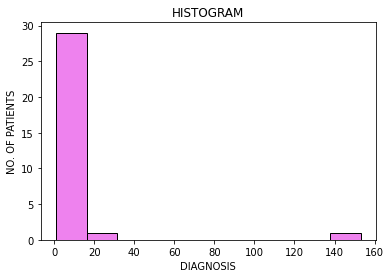

In [94]:
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.title('HISTOGRAM')
plt.pyplot.xlabel('DIAGNOSIS')
plt.pyplot.ylabel('NO. OF PATIENTS')
plt.pyplot.hist(df['diagnosis'].value_counts(),color='violet',ec='black')


In [95]:
df[['diagnosis','gender']].value_counts()

diagnosis                                       gender
lung cancer                                     Female    78
                                                Male      75
lung cancer(adenocarcinoma)                     Female    15
tuberculoma                                     Male       9
lung cancer(adenocarcinoma)                     Male       8
granuloma                                       Male       6
tuberculoma                                     Female     5
lung cancer(bronchioloalveolar cell carcinoma)  Female     4
pulmonary tuberculosis                          Male       3
metastasis of colon cancer                      Female     3
lung cancer(bronchioloalveolar cell carcinoma)  Male       3
sclerosing hemangioma                           Female     2
Inflammatory mass                               Female     2
lung cancer(squamous cell carcinoma)            Male       2
Cryptococcosis                                  Female     2
inflammatory mass             

([<matplotlib.patches.Wedge at 0x1f41a332880>,
 [Text(0.027978779917502132, -1.0996441187376615, ''),
  Text(0.08386393602298306, -1.0967984501423829, ''),
  Text(0.12564327252603183, -1.0928008821688193, ''),
  Text(0.22231246450622655, -1.0773008716812438, ''),
  Text(0.33059105794466737, -1.0491470594759469, ''),
  Text(0.38351668268902156, -1.0309776690594266, ''),
  Text(0.4354498396330246, -1.0101403056821232, ''),
  Text(0.48625613570236004, -0.9866888924538515, ''),
  Text(0.5235421444077157, -0.9674211197968393, ''),
  Text(0.5479793660068986, -0.9537917039011599, ''),
  Text(1.09891023362854, -0.048952001250899865, ''),
  Text(-0.35716937607203425, 1.04039897962095, ''),
  Text(-1.0949989425716582, 0.10477268616844108, ''),
  Text(-1.07869287818528, -0.21545689720302919, ''),
  Text(-1.0470234720156388, -0.3372563550895917, ''),
  Text(-1.023473572743538, -0.40311517696010657, ''),
  Text(-0.9835766260965545, -0.4925210864486098, ''),
  Text(-0.957257279638924, -0.54190266707

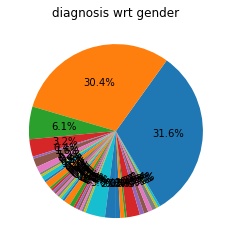

In [96]:
plt.pyplot.title('diagnosis wrt gender',color='black')
plt.pyplot.pie(df.groupby('diagnosis')['gender'].value_counts(),autopct='%1.1f%%',startangle=270)


In [97]:
df[['diagnosis','state']].value_counts()


diagnosis                                       state    
lung cancer                                     malignant    149
lung cancer(adenocarcinoma)                     malignant     23
tuberculoma                                     benign        14
granuloma                                       benign         8
lung cancer(bronchioloalveolar cell carcinoma)  malignant      7
lung cancer                                     benign         4
metastasis of colon cancer                      malignant      4
inflammatory mass                               benign         4
pulmonary tuberculosis                          benign         3
lung abscess                                    benign         2
Inflammatory mass                               benign         2
susp. inflammatory mass                         benign         2
sclerosing hemangioma                           benign         2
pulmonary hematoma                              benign         2
Cryptococcosis                  

([<matplotlib.patches.Wedge at 0x1f41a46ea30>,
 [Text(0.027978779917502132, -1.0996441187376615, ''),
  Text(0.08386393602298306, -1.0967984501423829, ''),
  Text(0.12564327252603183, -1.0928008821688193, ''),
  Text(0.24964196191822735, -1.0712977601253624, ''),
  Text(0.38351668268902156, -1.0309776690594266, ''),
  Text(0.4610021349601745, -0.9987377191045511, ''),
  Text(0.5358040939230666, -0.9606841171453194, ''),
  Text(0.7189038195086244, 0.8325726985050084, ''),
  Text(-1.0381065619472754, 0.3637784573638302, ''),
  Text(-1.099977755570018, -0.0069955165031338595, ''),
  Text(-1.0470234325453582, -0.3372564776263544, ''),
  Text(-1.0073506140036572, -0.4418650704303918, ''),
  Text(-0.9572572193892178, -0.541902773500213, ''),
  Text(-0.9431640845309768, -0.5660755335207878, ''),
  Text(-0.9208830636441395, -0.6016430695132986, ''),
  Text(-0.8972614398328825, -0.6363347457030952, ''),
  Text(-0.8550072107546832, -0.6920712893607833, ''),
  Text(-0.8092962213181631, -0.7450098

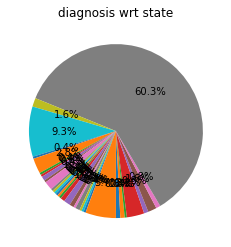

In [98]:
plt.pyplot.title('diagnosis wrt state')
plt.pyplot.pie(df.groupby('diagnosis')['state'].value_counts(),autopct='%1.1f%%',startangle=270,)

In [99]:
df.isnull().sum()

study_id     0
subtlety     0
size         0
age          0
gender       0
x            0
y            0
state        0
position     0
diagnosis    0
dtype: int64

In [100]:
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,3.0,17.0,50,Male,937.0,868.0,malignant,r.upper lobe(S2),lung cancer
243,JPCNN090.png,3.0,17.0,68,Female,937.0,868.0,malignant,r.upper lobe(S2),lung cancer
244,JPCNN091.png,3.0,17.0,81,Male,937.0,868.0,malignant,r.upper lobe(S2),lung cancer
245,JPCNN092.png,3.0,17.0,70,Female,937.0,868.0,malignant,r.upper lobe(S2),lung cancer
